In [1]:
# Exploring the dataset to understand its structure and contents

import pandas as pd

# Load the dataset
file_path = "Datasetextractedfinal.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Summary statistics for text length analysis
df['Questions Length'] = df['Questions'].astype(str).apply(len)
df['Answers Length'] = df['Answers'].astype(str).apply(len)

# Summary of text lengths in questions and answers
print("\nSummary Statistics for Text Lengths:")
print(df[['Questions Length', 'Answers Length']].describe())

# Checking the number of unique chapters
unique_chapters = df['chapter'].nunique()
print(f"\nTotal Unique Chapters: {unique_chapters}")

# Checking distribution of questions per chapter
questions_per_chapter = df.groupby('chapter')['Questions'].count().sort_values(ascending=False)
print("\nQuestions per Chapter:")
print(questions_per_chapter)

# Displaying the structure of chapter content
print("\nExample of Chapter Content:")
print(df[['chapter', 'Chapter Content']].drop_duplicates().head(10))

# Checking for duplicates in questions
duplicate_questions = df['Questions'].duplicated().sum()
print(f"\nTotal Duplicate Questions: {duplicate_questions}")

# Display dataset summary visually
df_overview = pd.DataFrame({
    "Total Rows": [df.shape[0]],
    "Total Columns": [df.shape[1]],
    "Unique Chapters": [unique_chapters],
    "Total Questions": [df['Questions'].count()],
    "Total Answers": [df['Answers'].count()],
    "Duplicate Questions": [duplicate_questions],
})

# Show the dataset summary
df_overview


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   chapter          486 non-null    object
 1   Chapter Content  83 non-null     object
 2   Questions        486 non-null    object
 3   Answers          486 non-null    object
dtypes: object(4)
memory usage: 84.7+ KB
None

First 5 Rows of the Dataset:
                                 chapter  \
0  1.1 Computing from Inception to Today   
1  1.1 Computing from Inception to Today   
2  1.1 Computing from Inception to Today   
3  1.1 Computing from Inception to Today   
4  1.1 Computing from Inception to Today   

                                     Chapter Content  \
0   Early computers were used predominantly by en...   
1                                                NaN   
2                                                NaN   
3                                     

Total Rows  Total Columns  Unique Chapters  Total Questions  Total Answers  \
0        2705              6               83              486            486   

   Duplicate Questions  
0                 2220

In [2]:
# Merging chapters that have the same name while keeping unique questions and answers

# Group by 'chapter' and keep the first occurrence of 'Chapter Content' since it's repeated
df_grouped = df.groupby('chapter', as_index=False).agg({
    'Chapter Content': 'first',  # Keep the first instance of chapter content
    'Questions': lambda x: list(x),  # Store all questions as a list
    'Answers': lambda x: list(x)  # Store all answers as a list
})

# Save the cleaned dataset to a new CSV file
output_file_path = "Merged_Chapter_Dataset.csv"
df_grouped.to_csv(output_file_path, index=False)

# Display first few rows to verify
df_grouped.head()


chapter  \
0              1.1 Computing from Inception to Today   
1                 1.2 Computer Hardware and Networks   
2  1.3 The Internet, Cloud Computing, and the Int...   
3  1.4 Safety, Security, Privacy, and the Ethical...   
4                        10.1 Data Tables and Ranges   

                                     Chapter Content  \
0   Early computers were used predominantly by en...   
1  Hardware components that make up a computer ar...   
2  The internet was initially rooted in governmen...   
3   Computer safety and security are paramount co...   
4  Data Tables can be used for automatically gene...   

                                           Questions  \
0  [ What are the key companies that have played ...   
1  [ What are the hardware components that make u...   
2  [What is the origin of the internet?,  What is...   
3  [What is the main importance of computer safet...   
4  [ What is the purpose of data tables in Excel?...   

                                             Answers  
0  [ IBM, Hewlett Packard, Xerox, Apple, and Micr...  
1  [The hardware components that make up a comput...  
2  [ The internet was initially rooted in governm...  
3  [ The main importance of computer safety and s...  
4  [ The purpose of data tables in Excel is to au...

In [3]:
# Count the number of questions per chapter
df_grouped['Number of Questions'] = df_grouped['Questions'].apply(len)

# Sort the chapters by the number of questions in descending order
df_questions_per_chapter = df_grouped[['chapter', 'Number of Questions']].sort_values(by='Number of Questions', ascending=False)

# Display the number of questions per chapter
import pandas as pd
df_questions_per_chapter.reset_index(drop=True, inplace=True)
df_questions_per_chapter


chapter  Number of Questions
0   9.3 Calculations and Basic Formulas in Microso...                   13
1    4.1 Microsoft Word: Advanced Formatting Features                   11
2                            10.2 More About Formulas                   10
3                            13.1 What Is a Database?                   10
4                        8.5 Social Media in Business                   10
..                                                ...                  ...
78  13.2 Microsoft Access: Main Features and Navig...                    3
79  10.3 Using Arithmetic, Statistical, and Logica...                    3
80                         3.6 Navigating Google Docs                    3
81                              2.2 Files and Folders                    3
82  3.3 Formatting Document Content in Microsoft Word                    1

[83 rows x 2 columns]

                                              chapter  Number of Questions
77  9.3 Calculations and Basic Formulas in Microso...                   13
47   4.1 Microsoft Word: Advanced Formatting Features                   11
5                            10.2 More About Formulas                   10
18                           13.1 What Is a Database?                   10
74                       8.5 Social Media in Business                   10
..                                                ...                  ...
19  13.2 Microsoft Access: Main Features and Navig...                    3
6   10.3 Using Arithmetic, Statistical, and Logica...                    3
43                         3.6 Navigating Google Docs                    3
33                              2.2 Files and Folders                    3
40  3.3 Formatting Document Content in Microsoft Word                    1

[83 rows x 2 columns]


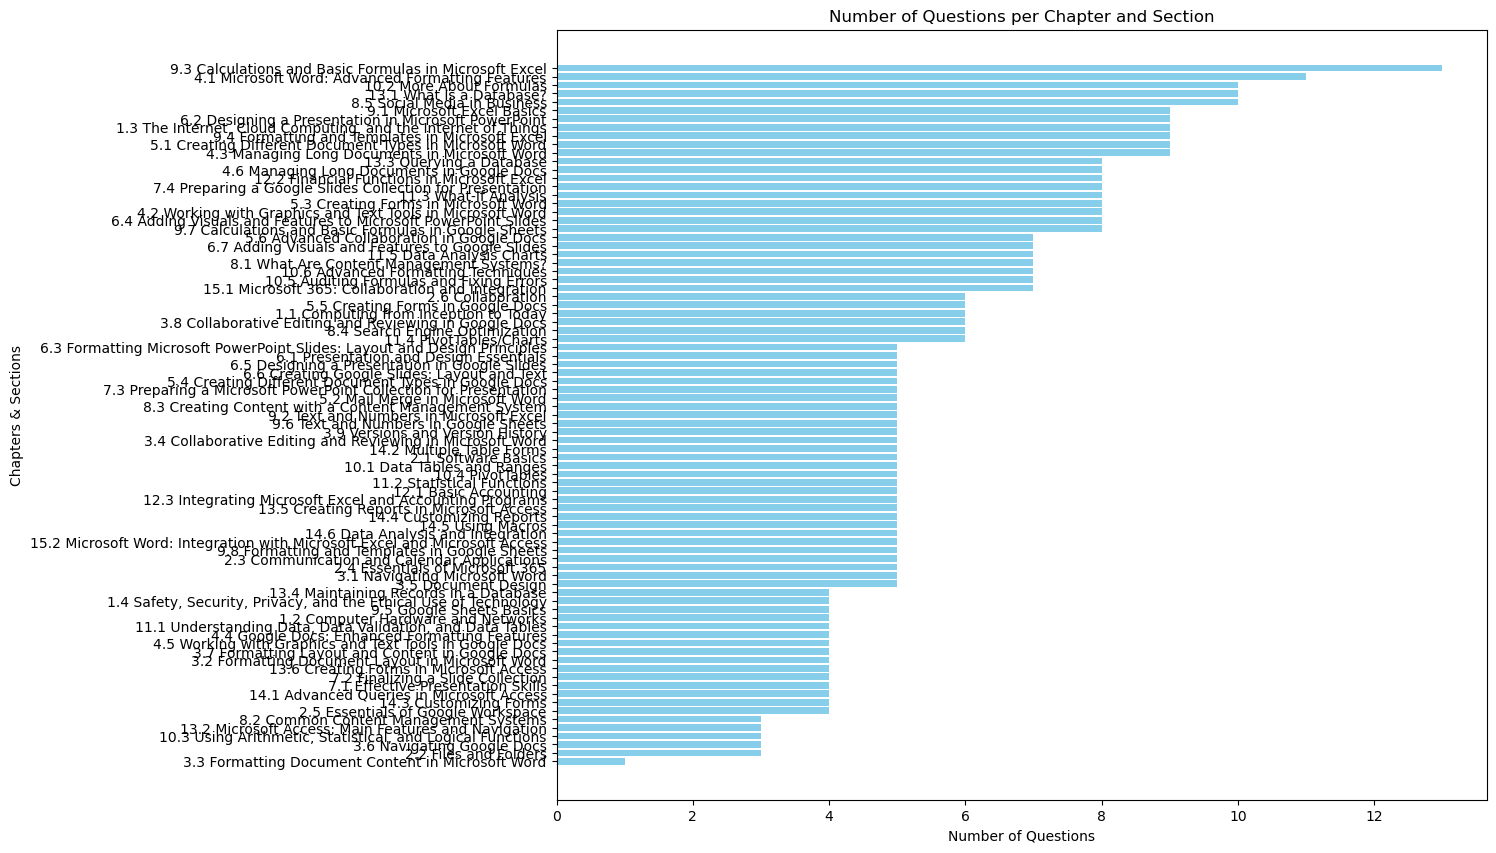

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to display questions per chapter
df_questions_per_chapter = df_grouped[['chapter', 'Number of Questions']].sort_values(by='Number of Questions', ascending=False)

# Display the DataFrame
print(df_questions_per_chapter)

# Save to CSV for further exploration if needed
df_questions_per_chapter.to_csv("Questions_Per_Chapter.csv", index=False)

# Visualization: Horizontal Bar Chart for Questions per Chapter
plt.figure(figsize=(12, 10))
plt.barh(df_questions_per_chapter['chapter'], df_questions_per_chapter['Number of Questions'], color="skyblue")

plt.xlabel("Number of Questions")
plt.ylabel("Chapters & Sections")
plt.title("Number of Questions per Chapter and Section")
plt.gca().invert_yaxis()  # Invert to show the highest number of questions at the top

plt.show()


                                              chapter  Number of Questions
0               1.1 Computing from Inception to Today                    6
1                  1.2 Computer Hardware and Networks                    4
2   1.3 The Internet, Cloud Computing, and the Int...                    9
3   1.4 Safety, Security, Privacy, and the Ethical...                    4
4                                 2.1 Software Basics                    5
..                                                ...                  ...
78                           14.4 Customizing Reports                    5
79                                  14.5 Using Macros                    5
80                 14.6 Data Analysis and Integration                    5
81  15.1 Microsoft 365: Collaboration and Integration                    7
82  15.2 Microsoft Word: Integration with Microsof...                    5

[83 rows x 2 columns]


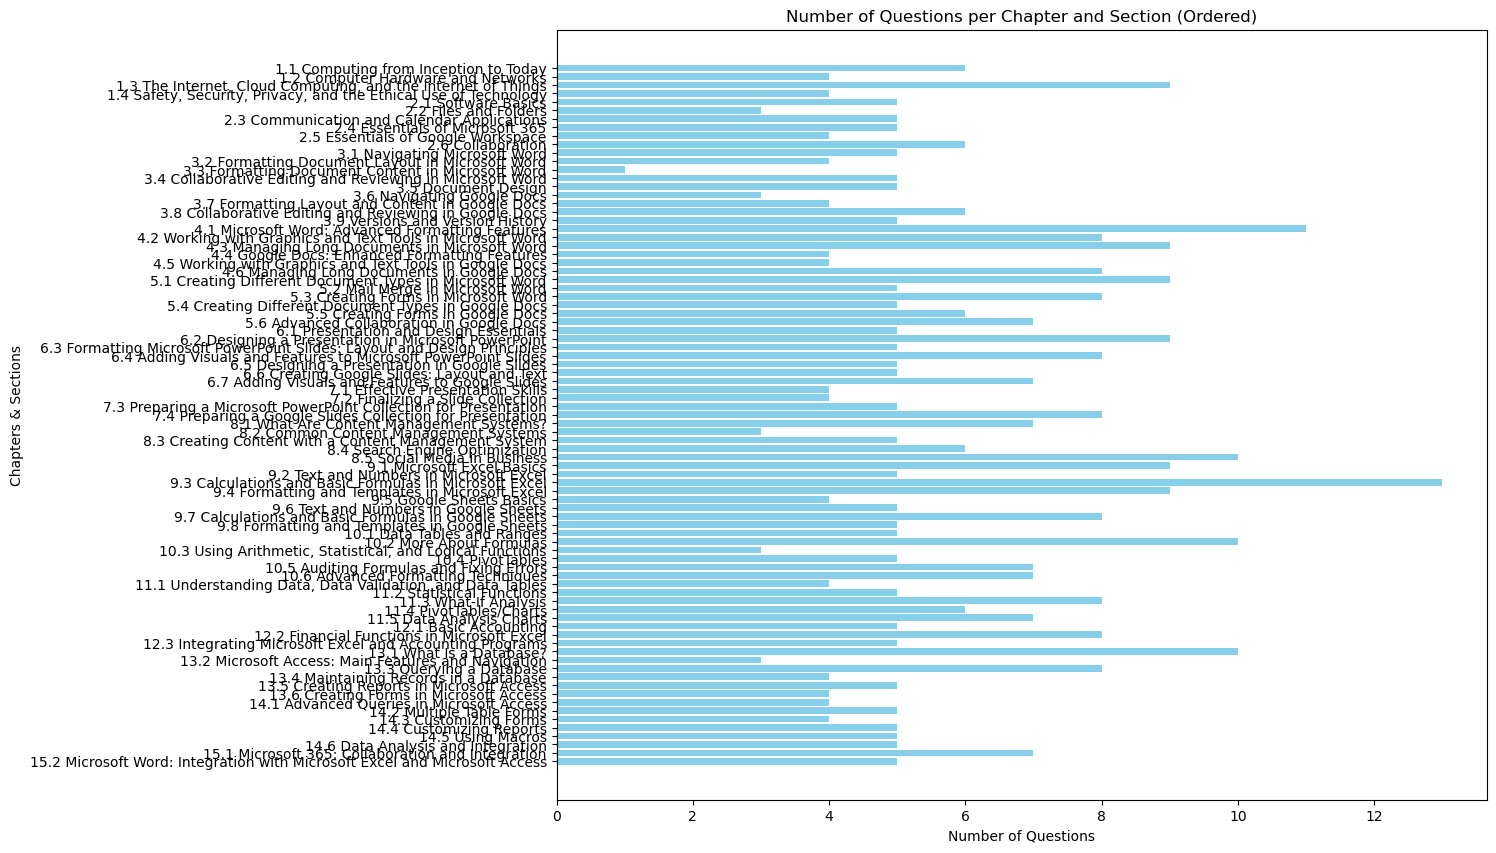

In [5]:
import re

# Function to extract numerical chapter section for sorting
def extract_chapter_number(chapter_name):
    match = re.search(r'(\d+\.\d+)', chapter_name)  # Extracts format like '1.1', '2.3', etc.
    return float(match.group(1)) if match else float('inf')  # Assign a high number to non-matching entries

# Apply sorting based on extracted numbers
df_questions_per_chapter_sorted = df_questions_per_chapter.copy()
df_questions_per_chapter_sorted['Chapter Number'] = df_questions_per_chapter_sorted['chapter'].apply(extract_chapter_number)
df_questions_per_chapter_sorted = df_questions_per_chapter_sorted.sort_values(by='Chapter Number').drop(columns=['Chapter Number'])

# Display the sorted DataFrame
df_questions_per_chapter_sorted.reset_index(drop=True, inplace=True)
print(df_questions_per_chapter_sorted)

# Save the sorted version for offline use
df_questions_per_chapter_sorted.to_csv("Questions_Per_Chapter_Sorted.csv", index=False)

# Visualization: Horizontal Bar Chart for Questions per Chapter (Ordered)
plt.figure(figsize=(12, 10))
plt.barh(df_questions_per_chapter_sorted['chapter'], df_questions_per_chapter_sorted['Number of Questions'], color="skyblue")

plt.xlabel("Number of Questions")
plt.ylabel("Chapters & Sections")
plt.title("Number of Questions per Chapter and Section (Ordered)")
plt.gca().invert_yaxis()  # Invert to show the highest number of questions at the top

plt.show()


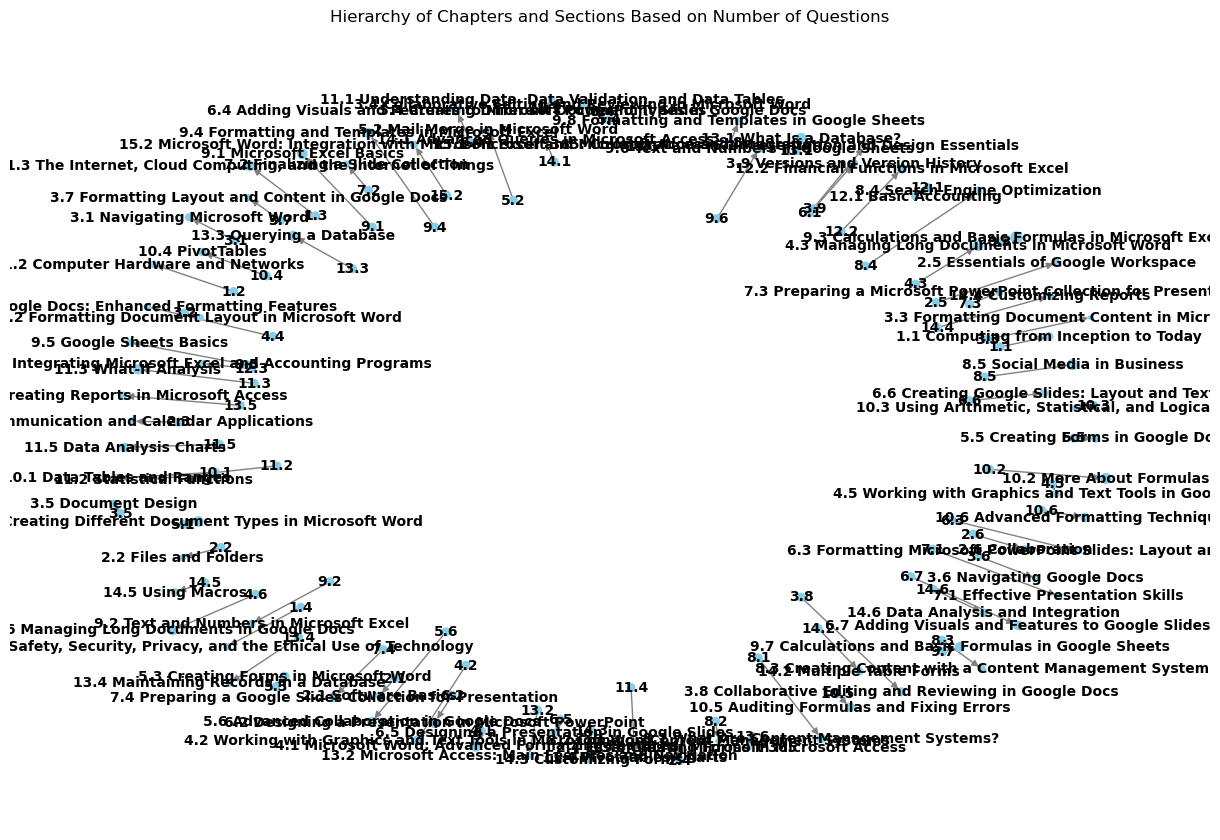

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a hierarchical graph using NetworkX to show chapter-section structure
G = nx.DiGraph()

# Add nodes and edges to represent hierarchy
for index, row in df_questions_per_chapter_sorted.iterrows():
    chapter_main = row['chapter'].split()[0]  # Extract main chapter (e.g., "1", "2", "10")
    G.add_node(chapter_main, size=30)  # Main chapter node
    G.add_node(row['chapter'], size=row['Number of Questions']*5)  # Section node with size based on questions
    G.add_edge(chapter_main, row['chapter'])  # Connect chapter to section

# Draw the hierarchical graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
sizes = [G.nodes[node]['size'] for node in G.nodes]

nx.draw(G, pos, with_labels=True, node_size=sizes, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")

plt.title("Hierarchy of Chapters and Sections Based on Number of Questions")
plt.show()


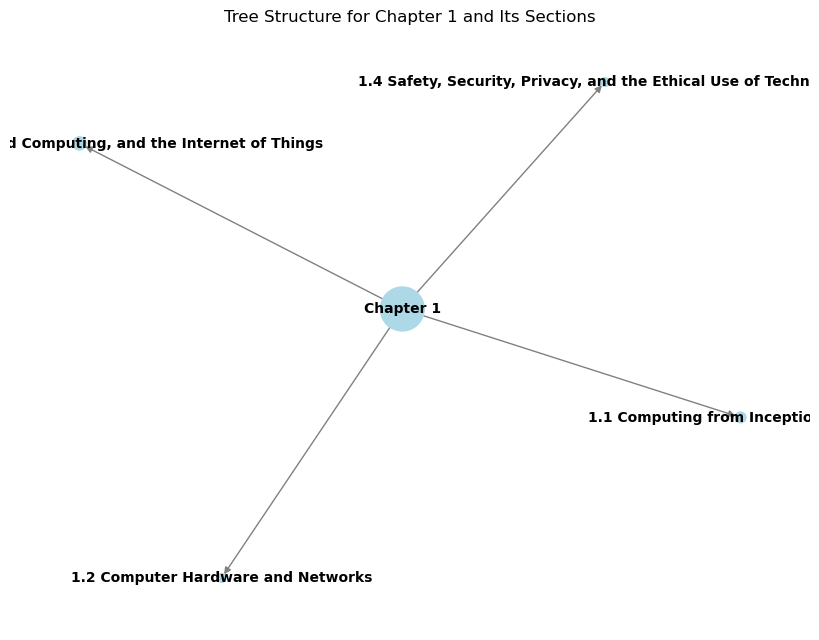

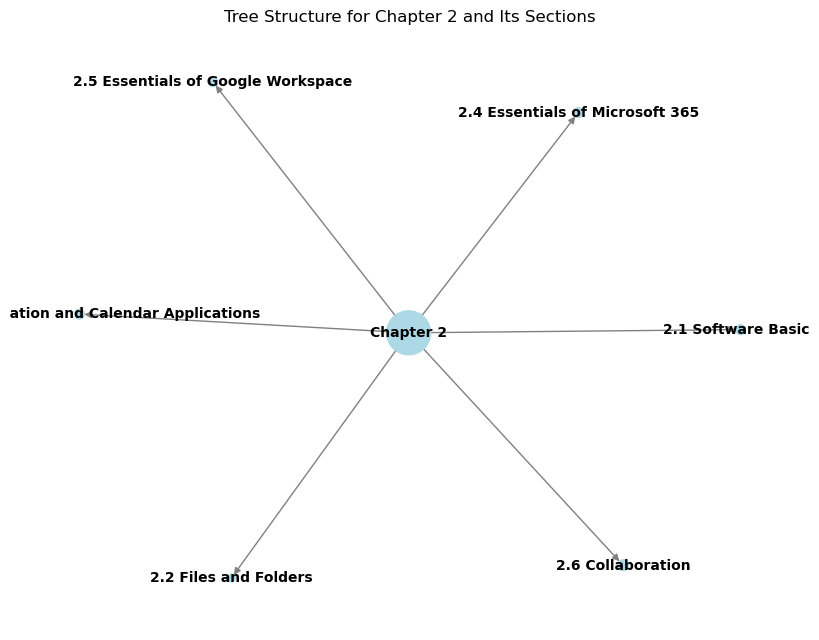

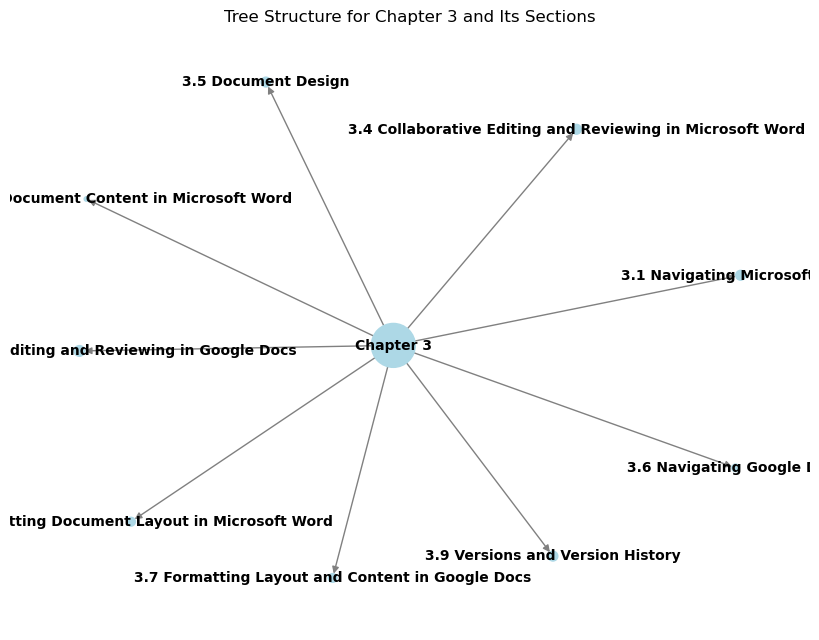

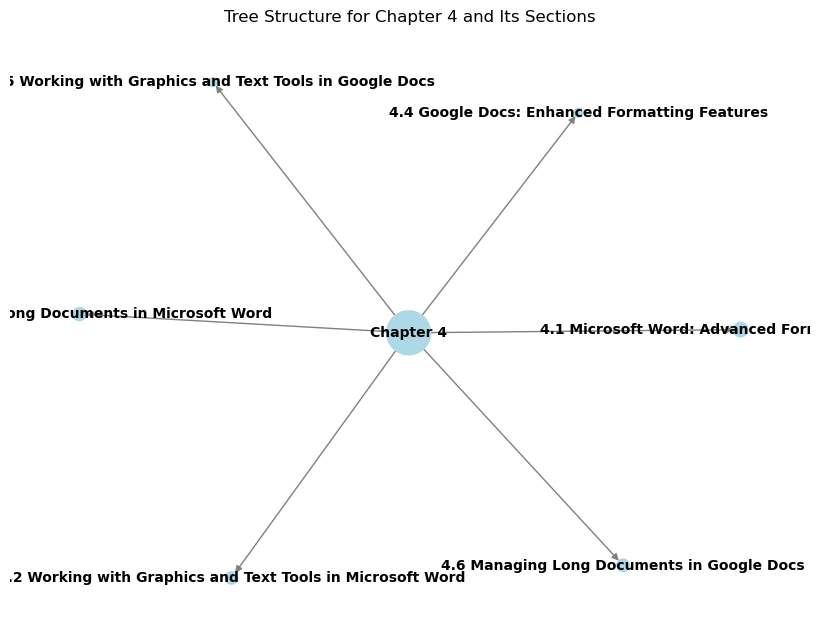

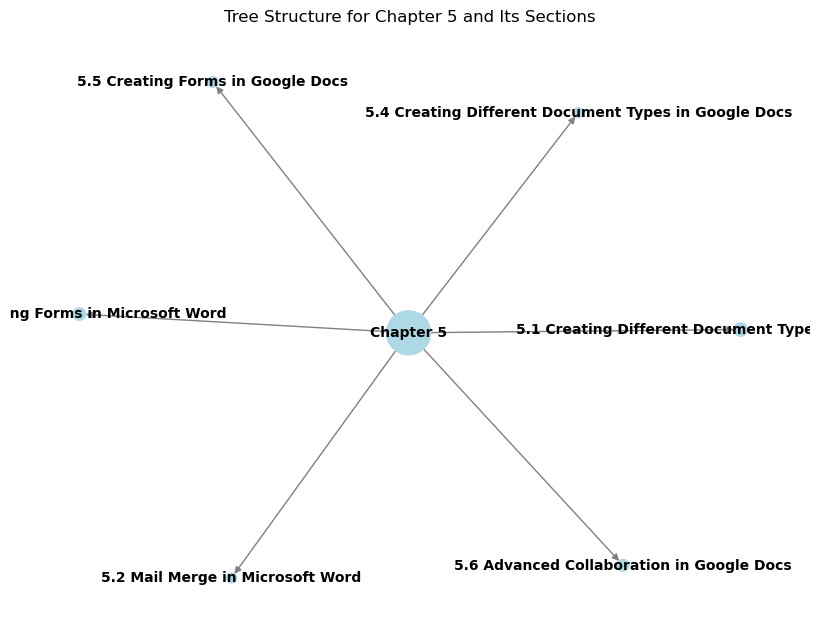

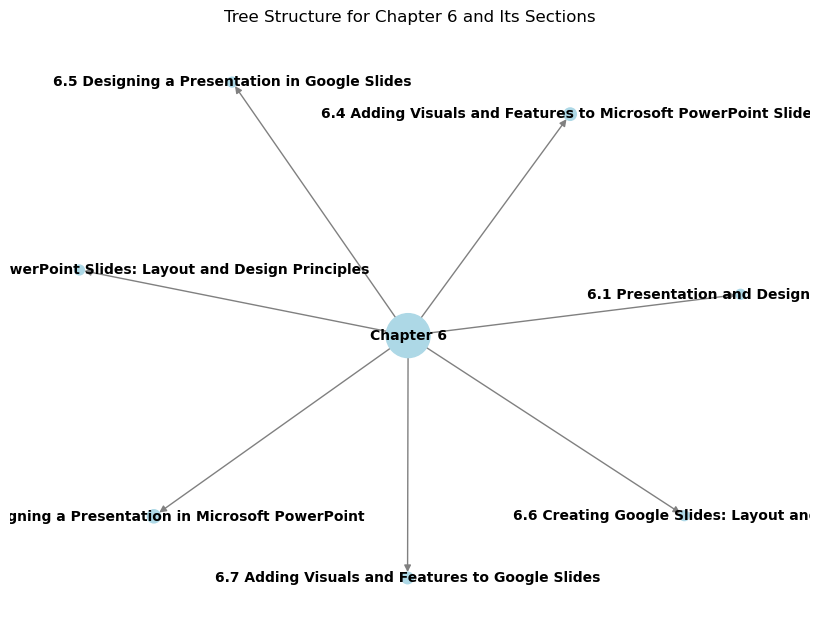

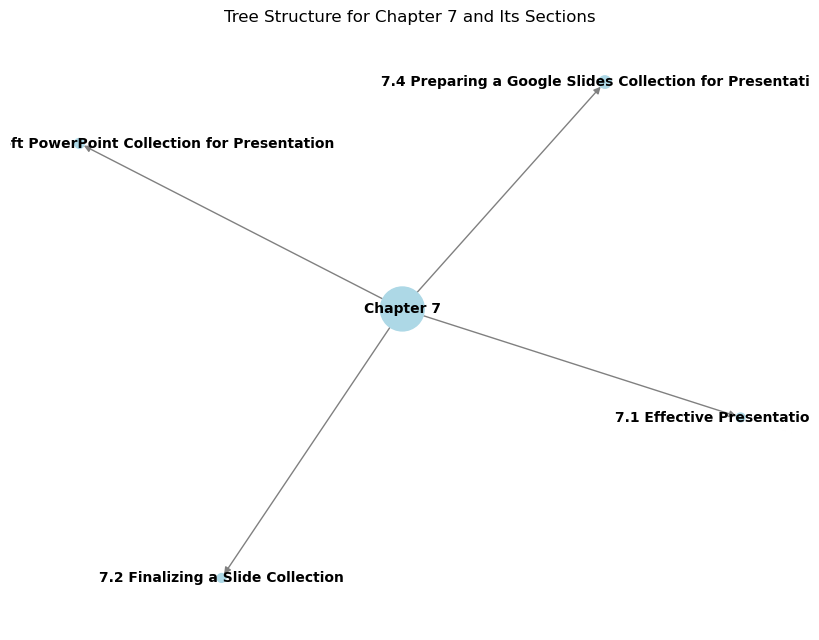

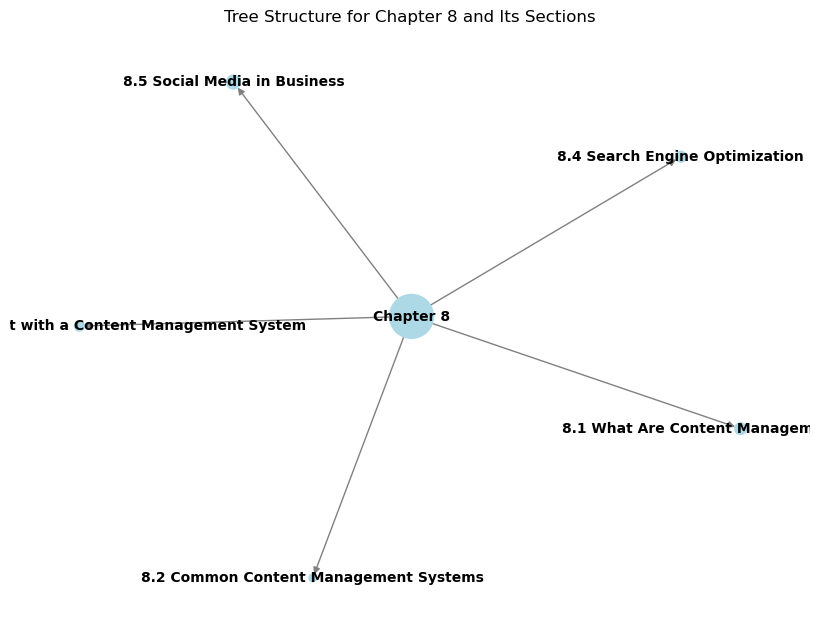

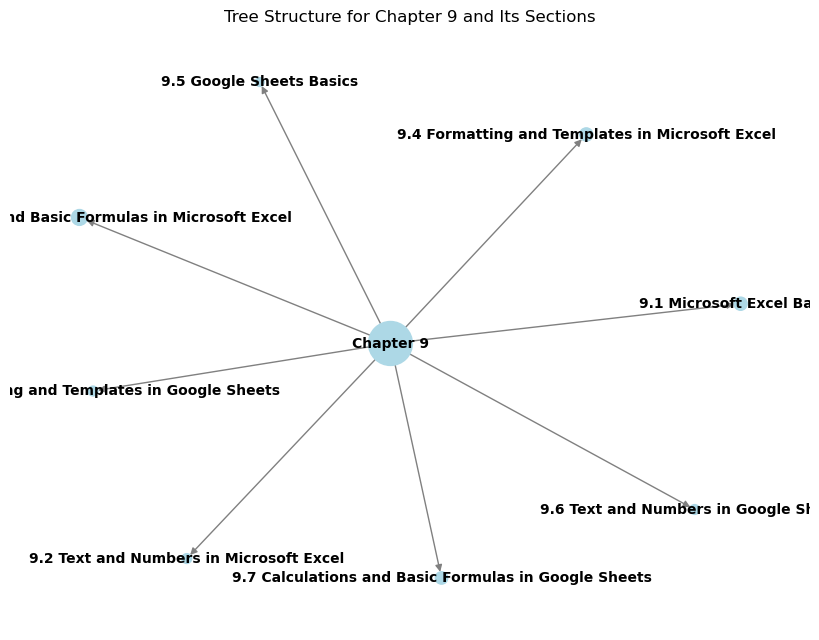

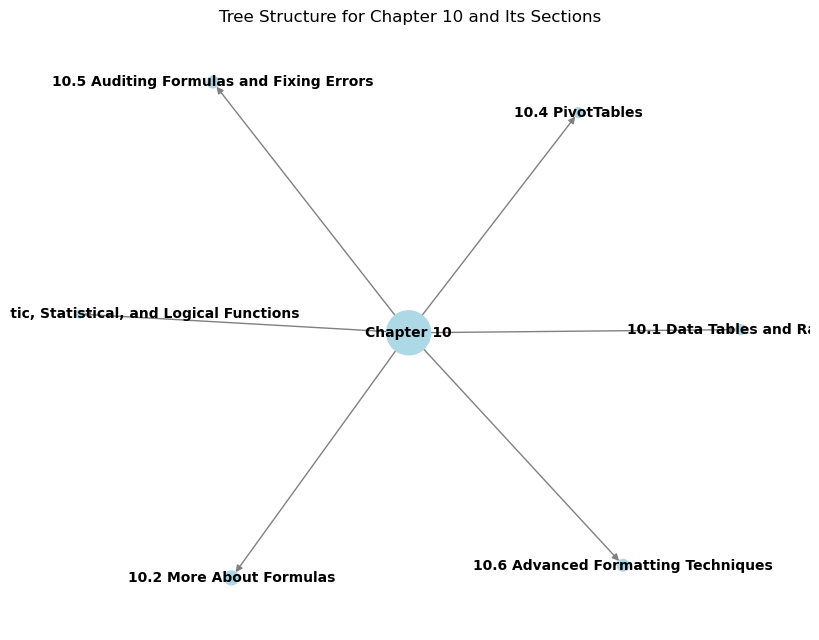

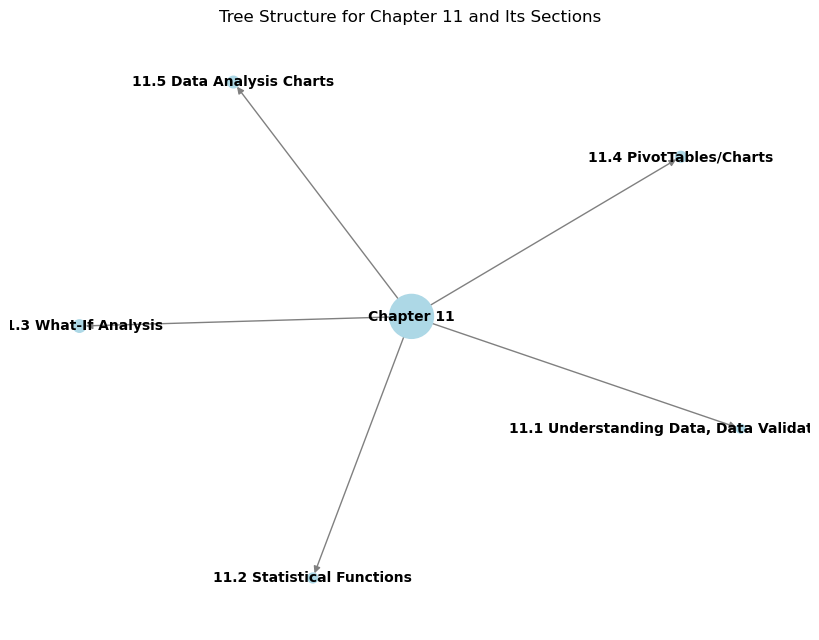

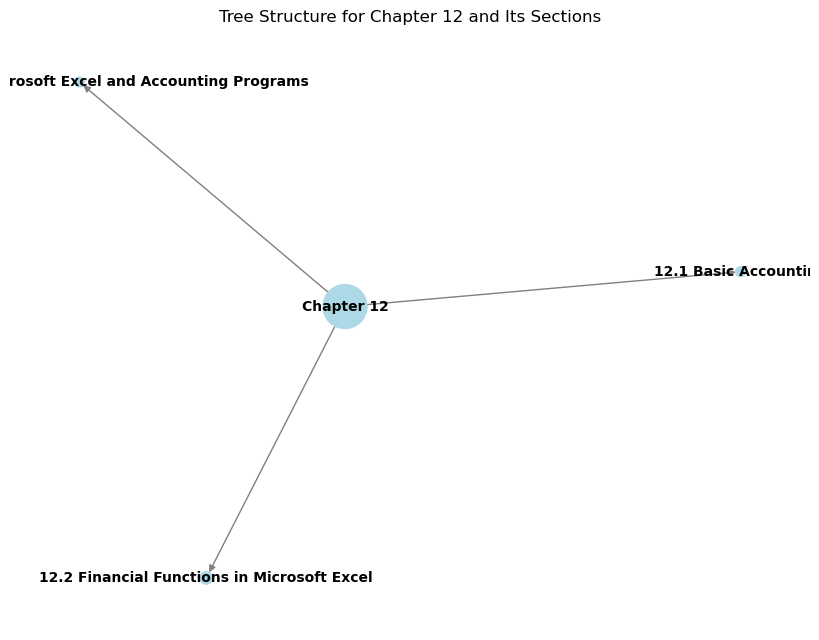

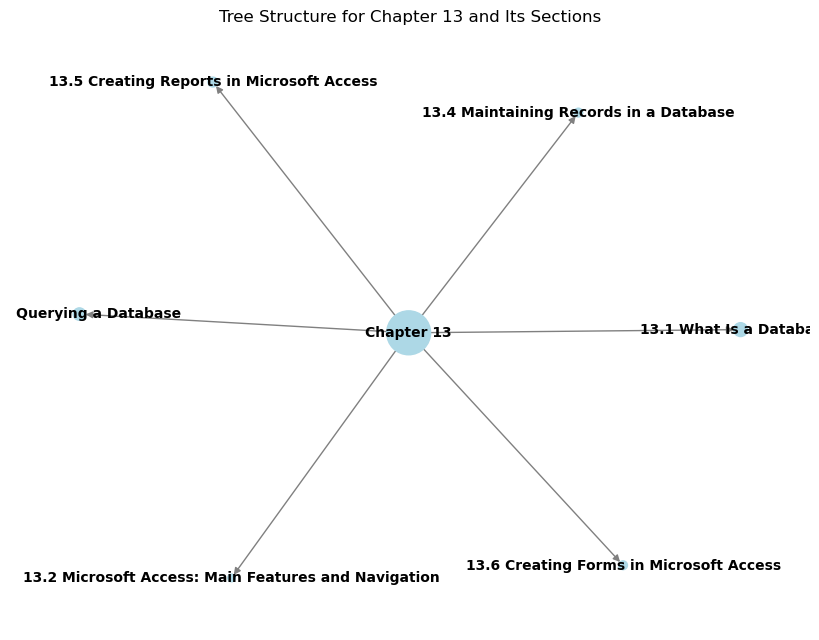

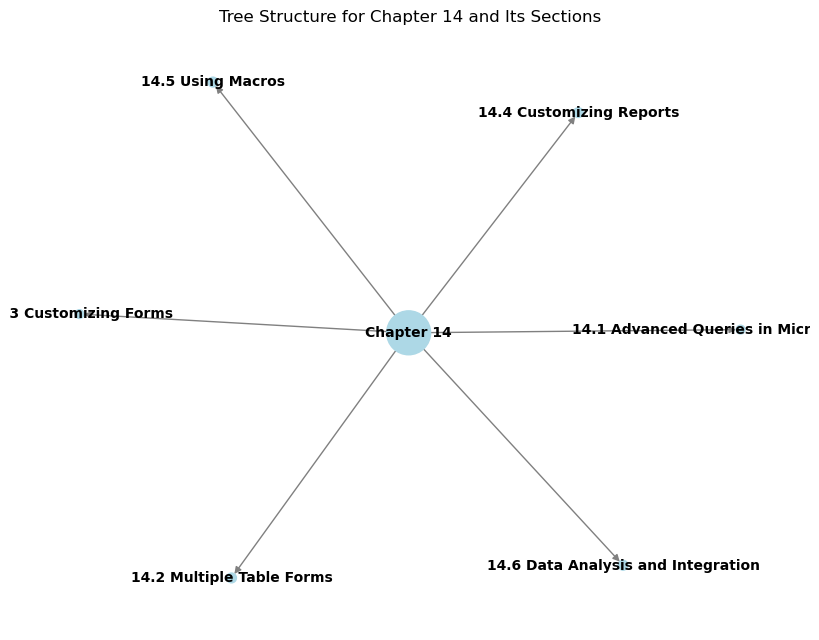

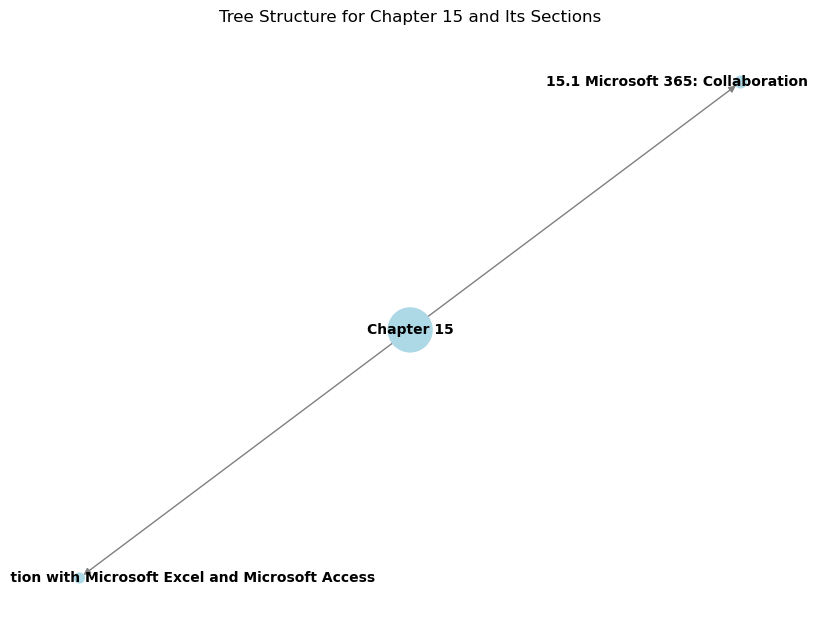

In [7]:
# Extract unique main chapter numbers
df_questions_per_chapter_sorted['main_chapter'] = df_questions_per_chapter_sorted['chapter'].str.split('.').str[0]
main_chapters = df_questions_per_chapter_sorted['main_chapter'].unique()

# Generate separate tree structures for each main chapter using a spring layout
for chapter_main in main_chapters:
    # Filter sections belonging to the current chapter (e.g., "1.1", "1.2" for "1")
    chapter_sections = df_questions_per_chapter_sorted[
        df_questions_per_chapter_sorted['chapter'].str.startswith(chapter_main + '.')
    ]

    if chapter_sections.empty:
        continue  # Skip if no sections are found for this chapter

    # Create a directed graph for this chapter
    G_chapter = nx.DiGraph()
    G_chapter.add_node(f"Chapter {chapter_main}", size=1000)  # Add main chapter node

    # Add sections under this chapter
    for _, row in chapter_sections.iterrows():
        section = row['chapter']
        G_chapter.add_node(section, size=row['Number of Questions'] * 10)  # Size based on number of questions
        G_chapter.add_edge(f"Chapter {chapter_main}", section)  # Connect chapter to section

    # Generate a spring layout (alternative to Graphviz)
    pos = nx.spring_layout(G_chapter, seed=42)  # Spring layout positions

    # Extract node sizes
    sizes = [G_chapter.nodes[node]['size'] for node in G_chapter.nodes]

    # Draw tree
    plt.figure(figsize=(8, 6))
    nx.draw(
        G_chapter,
        pos,
        with_labels=True,
        node_size=sizes,
        node_color="lightblue",
        edge_color="gray",
        font_size=10,
        font_weight="bold",
        arrows=True
    )

    plt.title(f"Tree Structure for Chapter {chapter_main} and Its Sections")
    plt.show()


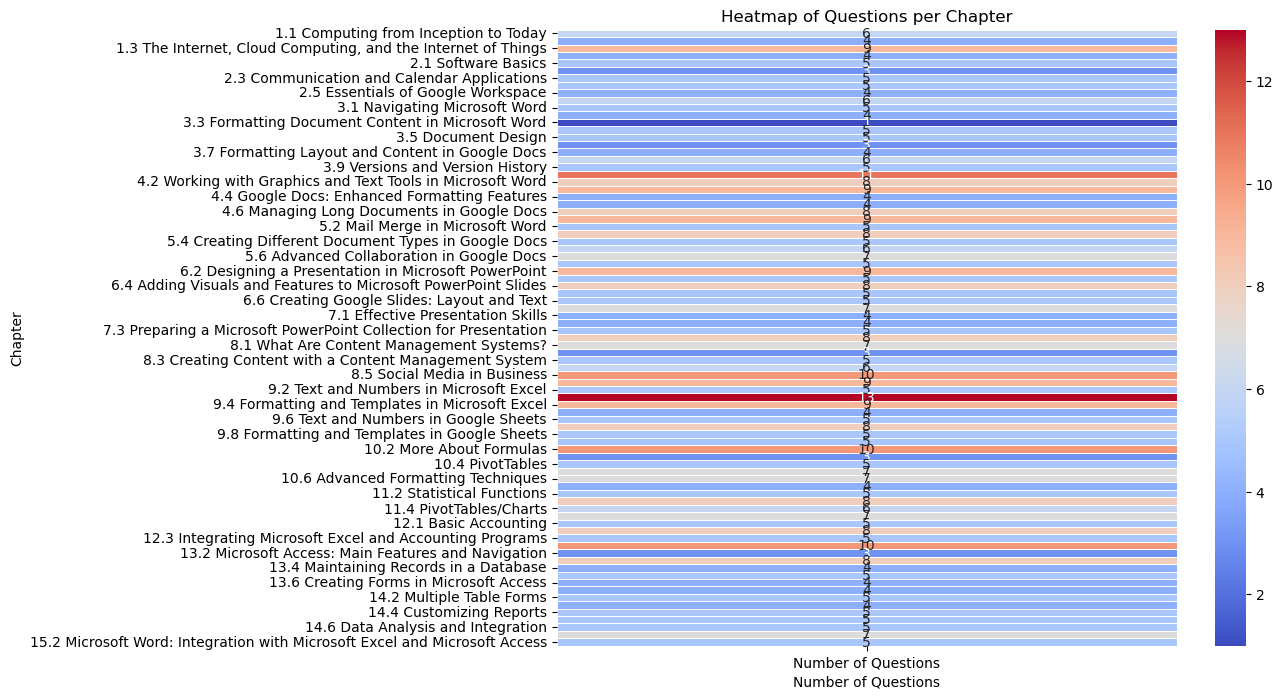

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = df_questions_per_chapter_sorted.set_index("chapter")[["Number of Questions"]]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Questions per Chapter")
plt.xlabel("Number of Questions")
plt.ylabel("Chapter")
plt.show()


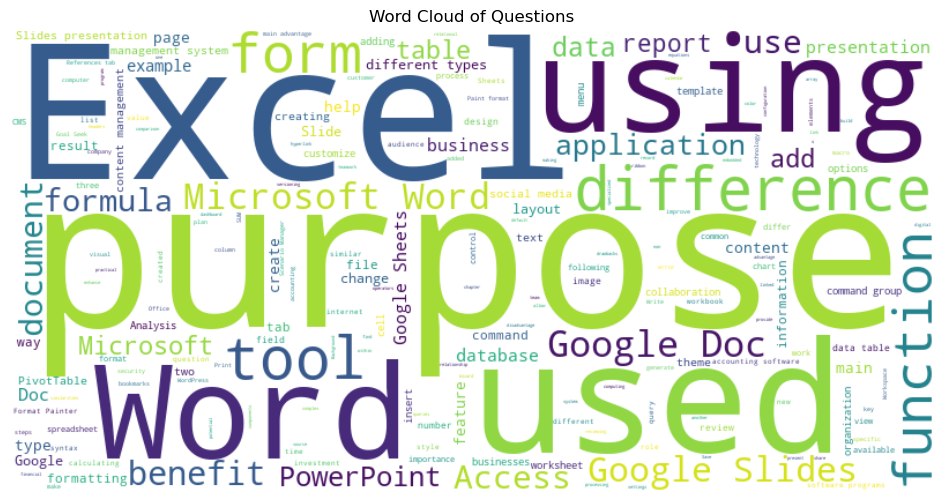

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate text from all questions
question_text = " ".join(df_grouped["Questions"].explode().dropna().astype(str))

# Create word cloud
wordcloud_q = WordCloud(width=800, height=400, background_color="white").generate(question_text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_q, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.show()


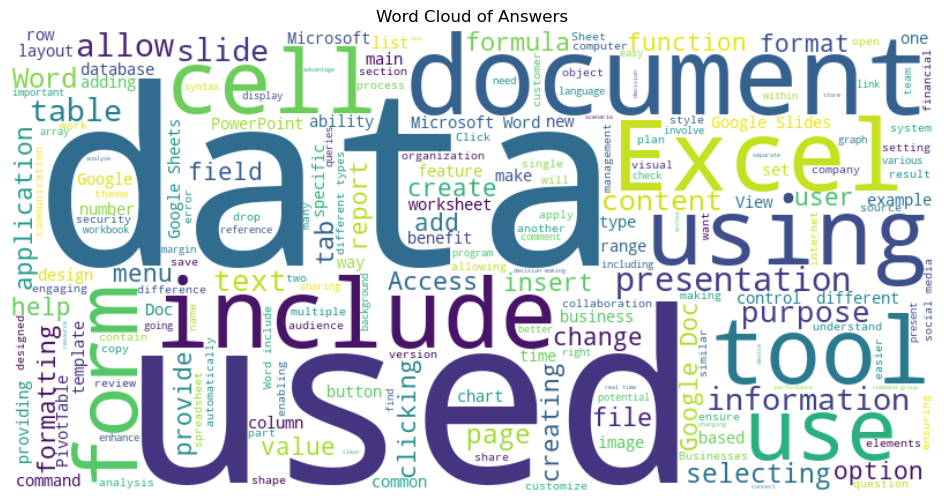

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate text from all answers
answer_text = " ".join(df_grouped["Answers"].explode().dropna().astype(str))

# Create word cloud
wordcloud_a = WordCloud(width=800, height=400, background_color="white").generate(answer_text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_a, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Answers")
plt.show()


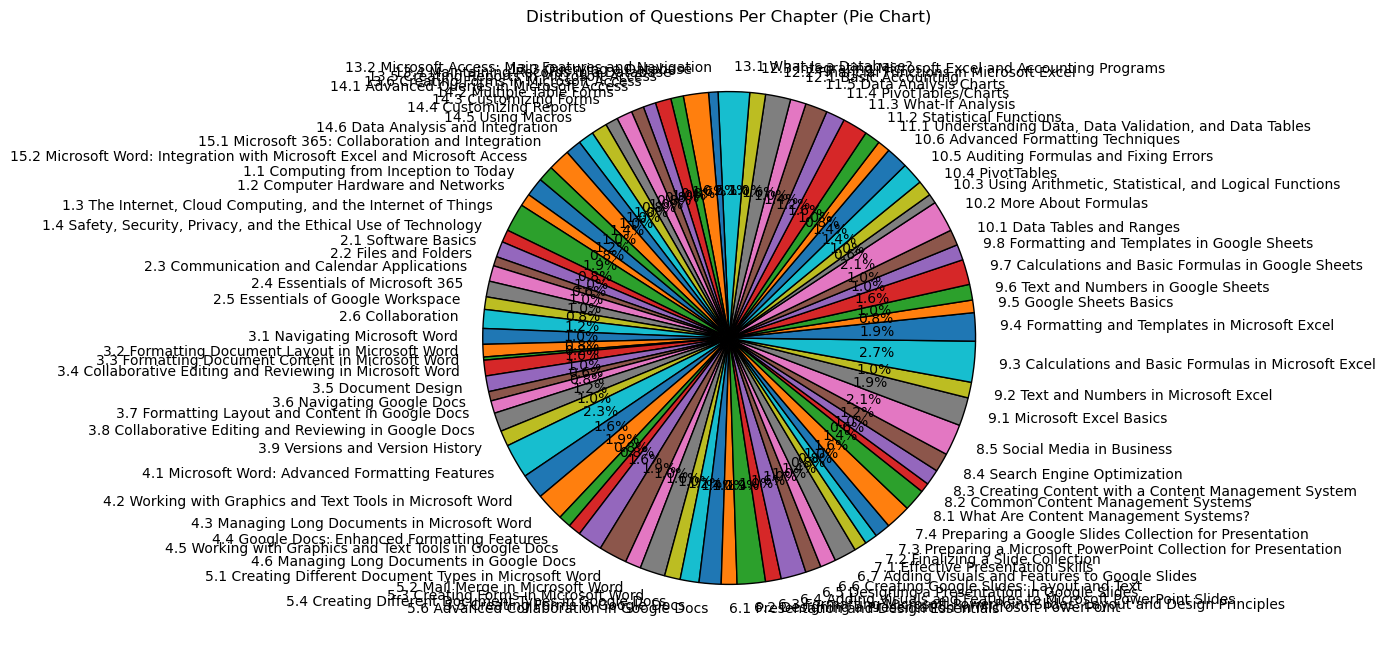

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.pie(df_questions_per_chapter_sorted['Number of Questions'], labels=df_questions_per_chapter_sorted['chapter'],
        autopct='%1.1f%%', startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Distribution of Questions Per Chapter (Pie Chart)")
plt.show()


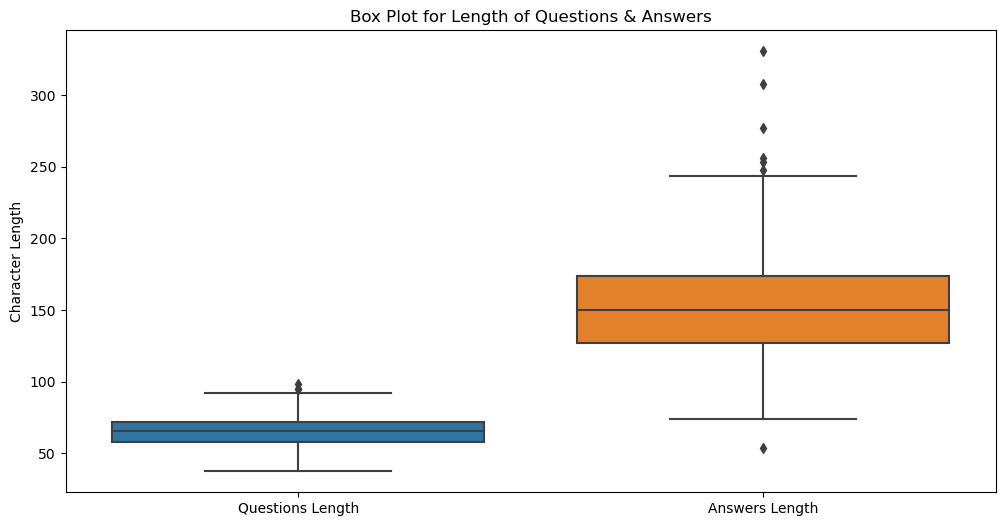

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate text lengths
df_grouped["Questions Length"] = df_grouped["Questions"].apply(lambda q: np.mean([len(str(x)) for x in q]))
df_grouped["Answers Length"] = df_grouped["Answers"].apply(lambda a: np.mean([len(str(x)) for x in a]))

# Boxplot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_grouped[["Questions Length", "Answers Length"]])
plt.title("Box Plot for Length of Questions & Answers")
plt.ylabel("Character Length")
plt.show()


##Generating flash cards

In [13]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Convert questions and answers into a list of tuples
flashcards = list(zip(df_grouped["Questions"].explode().dropna(), df_grouped["Answers"].explode().dropna()))

# Shuffle flashcards for better study experience
random.shuffle(flashcards)

# Widget setup
output = widgets.Output()
question_label = widgets.Label(value="Click 'Next' to start!")
answer_label = widgets.Label(value="")
show_answer_btn = widgets.Button(description="Show Answer", button_style="info")
next_card_btn = widgets.Button(description="Next", button_style="success")

# Function to display a new question
def show_question(_):
    global current_question, current_answer
    clear_output(wait=True)
    
    if flashcards:
        current_question, current_answer = random.choice(flashcards)
        question_label.value = f"❓ {current_question}"
        answer_label.value = "🔒 Click 'Show Answer' to reveal!"
    else:
        question_label.value = "No more flashcards!"
    
    display(question_label, show_answer_btn, answer_label, next_card_btn)

# Function to reveal the answer
def show_answer(_):
    answer_label.value = f"✅ {current_answer}"

# Link buttons to functions
show_answer_btn.on_click(show_answer)
next_card_btn.on_click(show_question)

# Display flashcards
show_question(None)


Label(value='❓  How is the process of creating a worksheet and formatting cells in an existing worksheet in Sh…

Button(button_style='info', description='Show Answer', style=ButtonStyle())

Label(value="🔒 Click 'Show Answer' to reveal!")

Button(button_style='success', description='Next', style=ButtonStyle())

In [14]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Convert questions and answers into a list of tuples
flashcards = list(zip(df_grouped["Questions"].explode().dropna(), df_grouped["Answers"].explode().dropna()))

# Shuffle flashcards for randomness
random.shuffle(flashcards)

# Game State
current_index = 0
flipped = False

# UI Elements
output = widgets.Output()
flashcard_label = widgets.Label(value="Click 'Next' to start!")
flip_button = widgets.Button(description="Flip Card 🔄", button_style="info")
next_card_btn = widgets.Button(description="Next ➡️", button_style="success")

# Function to show a flashcard (Question)
def show_flashcard(_):
    global current_index, flipped
    flipped = False  # Reset flip state
    clear_output(wait=True)

    if current_index < len(flashcards):
        question, _ = flashcards[current_index]
        flashcard_label.value = f"🃏 {question} (Tap to Flip)"
        display(flashcard_label, flip_button, next_card_btn)
    else:
        flashcard_label.value = "🎉 You've completed all flashcards!"
        display(flashcard_label)

# Function to flip the flashcard (Reveal Answer)
def flip_flashcard(_):
    global flipped
    if not flipped:
        _, answer = flashcards[current_index]
        flashcard_label.value = f"✅ {answer}"
        flipped = True
    else:
        show_flashcard(None)  # Flip back to question

# Function to go to the next flashcard
def next_flashcard(_):
    global current_index
    current_index += 1
    show_flashcard(None)

# Link buttons to functions
flip_button.on_click(flip_flashcard)
next_card_btn.on_click(next_flashcard)

# Start the flashcard session
show_flashcard(None)


Label(value='🃏 How is making multilevel lists in Google Docs similar to the same process in Microsoft Word? (T…

Button(button_style='info', description='Flip Card 🔄', style=ButtonStyle())

Button(button_style='success', description='Next ➡️', style=ButtonStyle())

##Creating mcqs

In [15]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Convert questions and answers into a list of tuples
flashcards = list(zip(df_grouped["Questions"].explode().dropna(), df_grouped["Answers"].explode().dropna()))

# Shuffle flashcards for randomness
random.shuffle(flashcards)

# Game State
score = 0
total_questions = 5  # Number of questions per round
questions_asked = 0

# UI Elements
output = widgets.Output()
question_label = widgets.Label(value="Click 'Next' to start!")
score_label = widgets.Label(value=f"Score: {score}")
progress_label = widgets.Label(value="Progress: 0/5")
answer_buttons = [widgets.Button(description="", button_style="primary") for _ in range(4)]
next_card_btn = widgets.Button(description="Next ➡️", button_style="success", disabled=True)

# Function to generate multiple-choice options
def generate_options(correct_answer):
    wrong_answers = random.sample([ans for _, ans in flashcards if ans != correct_answer], 3)
    options = wrong_answers + [correct_answer]
    random.shuffle(options)
    return options

# Function to display a new question
def show_question(_):
    global current_question, correct_answer, questions_asked

    if questions_asked >= total_questions:
        question_label.value = "🎉 Game Over! Your Final Score: " + str(score)
        return

    questions_asked += 1
    clear_output(wait=True)

    if flashcards:
        current_question, correct_answer = random.choice(flashcards)
        question_label.value = f"❓ {current_question}"
        options = generate_options(correct_answer)

        for i, btn in enumerate(answer_buttons):
            btn.description = options[i]
            btn.on_click(check_answer)

        progress_label.value = f"Progress: {questions_asked}/{total_questions}"
        next_card_btn.disabled = True  # Disable "Next" button until answer is chosen

    else:
        question_label.value = "No more flashcards!"

    display(question_label, *answer_buttons, progress_label, score_label, next_card_btn)

# Function to check the selected answer
def check_answer(btn):
    global score
    if btn.description == correct_answer:
        score += 10  # Award points for correct answer
        score_label.value = f"🎉 Correct! Score: {score}"
    else:
        score_label.value = f"❌ Wrong! Correct Answer: {correct_answer} | Score: {score}"
    
    next_card_btn.disabled = False  # Enable "Next" button

# Link buttons to functions
next_card_btn.on_click(show_question)

# Display first question
show_question(None)


Label(value='❓ How can you create, change, or remove joins in Access?')

Button(button_style='primary', description=' Joins can be created, changed, or removed in Access using the Que…

Button(button_style='primary', description='The Track Changes feature in Microsoft Word allows users to see wh…

Button(button_style='primary', description='You can calculate values from tables in queries using the "Calcula…

Button(button_style='primary', description='The tool in Excel for verifying the quality of data in your spread…

Label(value='Progress: 1/5')

Label(value='Score: 0')

Button(button_style='success', description='Next ➡️', disabled=True, style=ButtonStyle())

In [16]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output
import re

# Convert questions and answers into a list of tuples
flashcards = list(zip(df_grouped["Questions"].explode().dropna(), df_grouped["Answers"].explode().dropna()))

# Shuffle flashcards for randomness
random.shuffle(flashcards)

# Game State
score = 0
total_questions = 5  # Number of questions per round
questions_asked = 0

# UI Elements
output = widgets.Output()
question_label = widgets.Label(value="Click 'Next' to start!")
score_label = widgets.Label(value=f"Score: {score}")
progress_label = widgets.Label(value="Progress: 0/5")
answer_buttons = [widgets.Button(description="", button_style="primary") for _ in range(4)]
next_card_btn = widgets.Button(description="Next ➡️", button_style="success", disabled=True)

# Function to create well-designed distractors
def generate_distractors(correct_answer):
    """Creates high-quality incorrect options based on MCQ best practices."""

    # Step 1: Paraphrase the correct answer (avoiding obvious patterns)
    paraphrased_correct = paraphrase_answer(correct_answer)

    # Step 2: Generate one "confusing but incorrect" answer
    confusing_answer = introduce_common_misconception(correct_answer)

    # Step 3: Create two completely incorrect answers (opposite or misused concepts)
    wrong1 = negate_meaning(correct_answer)
    wrong2 = replace_keywords(correct_answer)

    return [paraphrased_correct, confusing_answer, wrong1, wrong2]

# Function to paraphrase correct answers while keeping meaning intact
def paraphrase_answer(answer):
    replacements = [
        (r"\bis\b", "can be thought of as"),
        (r"\bare\b", "are often mistaken for"),
        (r"\bthe\b", "one form of"),
        (r"\ban\b", "a common type of"),
        (r"\bhas\b", "typically contains"),
        (r"\bused\b", "frequently applied in"),
        (r"\bprovides\b", "is believed to provide")
    ]
    
    for pattern, repl in replacements:
        answer = re.sub(pattern, repl, answer, flags=re.IGNORECASE)
    
    return answer

# Function to create a common misconception as a distractor
def introduce_common_misconception(answer):
    return f"{answer} but incorrectly assumes that it applies to all cases."

# Function to generate an opposite-meaning distractor
def negate_meaning(answer):
    return answer.replace("is", "is NOT").replace("helps", "hinders").replace("increases", "reduces")

# Function to swap key words for misleading distractors
def replace_keywords(answer):
    keyword_replacements = {
        "Excel": "Word",
        "database": "spreadsheet",
        "increase": "decrease",
        "positive": "negative",
        "efficiency": "inefficiency"
    }
    for key, val in keyword_replacements.items():
        answer = answer.replace(key, val)
    return answer

# Function to display a new question
def show_question(_):
    global current_question, correct_answer, questions_asked

    if questions_asked >= total_questions:
        question_label.value = "🎉 Game Over! Your Final Score: " + str(score)
        return

    questions_asked += 1
    clear_output(wait=True)

    if flashcards:
        current_question, correct_answer = random.choice(flashcards)
        question_label.value = f"❓ {current_question}"

        # Generate answer choices (1 correct, 1 confusing, 2 fully wrong)
        options = generate_distractors(correct_answer) + [correct_answer]
        random.shuffle(options)  # Shuffle to avoid patterns

        for i, btn in enumerate(answer_buttons):
            btn.description = options[i]
            btn.on_click(check_answer)

        progress_label.value = f"Progress: {questions_asked}/{total_questions}"
        next_card_btn.disabled = True  # Disable "Next" button until answer is chosen

    else:
        question_label.value = "No more flashcards!"

    display(question_label, *answer_buttons, progress_label, score_label, next_card_btn)

# Function to check the selected answer
def check_answer(btn):
    global score
    if btn.description == correct_answer:
        score += 10  # Award points for correct answer
        score_label.value = f"🎉 Correct! Score: {score}"
    else:
        score_label.value = f"❌ Wrong! Correct Answer: {correct_answer} | Score: {score}"
    
    next_card_btn.disabled = False  # Enable "Next" button

# Link buttons to functions
next_card_btn.on_click(show_question)

# Display first question
show_question(None)


Label(value='❓  Write a formula to add 5 and 3.')

Button(button_style='primary', description='The formula is: 5 + 3', style=ButtonStyle())

Button(button_style='primary', description='one form of formula can be thought of as: 5 + 3', style=ButtonStyl…

Button(button_style='primary', description='The formula is: 5 + 3', style=ButtonStyle())

Button(button_style='primary', description='The formula is NOT: 5 + 3', style=ButtonStyle())

Label(value='Progress: 1/5')

Label(value='Score: 0')

Button(button_style='success', description='Next ➡️', disabled=True, style=ButtonStyle())

##creating filll in the blanks

In [17]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output
import re

# Convert questions and answers into a list of tuples
flashcards = list(zip(df_grouped["Questions"].explode().dropna(), df_grouped["Answers"].explode().dropna()))

# Shuffle flashcards for randomness
random.shuffle(flashcards)

# Game State
score = 0
total_questions = 5  # Number of questions per round
questions_asked = 0
current_question = ""
correct_answers = []
case_sensitive = False  # Toggle case sensitivity

# UI Elements
output = widgets.Output()
question_label = widgets.Label(value="Click 'Next' to start!")
score_label = widgets.Label(value=f"Score: {score}")
progress_label = widgets.Label(value="Progress: 0/5")
answer_input = widgets.Text(placeholder="Type your answer here...")
submit_btn = widgets.Button(description="Submit", button_style="primary")
next_card_btn = widgets.Button(description="Next ➡️", button_style="success", disabled=True)

# Function to create a fill-in-the-blanks question
def create_fill_in_the_blank(question, answer):
    """Creates a sentence with a missing word or phrase for fill-in-the-blank."""
    words = answer.split()
    blanks = []
    
    if len(words) > 1:
        missing_word = random.choice(words)  # Randomly remove a word from the answer
        blanks.append(missing_word)
        question = question.replace(missing_word, "_____", 1)
    else:
        blanks.append(answer)
        question = question.replace(answer, "_____")

    return question, blanks

# Function to display a new question
def show_question(_):
    global current_question, correct_answers, questions_asked

    if questions_asked >= total_questions:
        question_label.value = "🎉 Game Over! Your Final Score: " + str(score)
        return

    questions_asked += 1
    clear_output(wait=True)

    if flashcards:
        question, answer = random.choice(flashcards)
        formatted_question, blanks = create_fill_in_the_blank(question, answer)
        current_question, correct_answers = formatted_question, [x.lower() for x in blanks]

        question_label.value = f"✏️ {current_question}"
        answer_input.value = ""
        progress_label.value = f"Progress: {questions_asked}/{total_questions}"
        next_card_btn.disabled = True  # Disable "Next" button until answer is checked

    else:
        question_label.value = "No more flashcards!"

    display(question_label, answer_input, submit_btn, progress_label, score_label, next_card_btn)

# Function to check the entered answer
def check_answer(_):
    global score
    user_answer = answer_input.value.strip()
    
    if not case_sensitive:
        user_answer = user_answer.lower()

    if user_answer in correct_answers:
        score += 10  # Award points for correct answer
        score_label.value = f"🎉 Correct! Score: {score}"
    else:
        correct_display = " or ".join(correct_answers)
        score_label.value = f"❌ Wrong! Correct Answer: {correct_display} | Score: {score}"
    
    next_card_btn.disabled = False  # Enable "Next" button

# Link buttons to functions
submit_btn.on_click(check_answer)
next_card_btn.on_click(show_question)

# Display first question
show_question(None)


Label(value='✏️  What is the purpose of a database?')

Text(value='', placeholder='Type your answer here...')

Button(button_style='primary', description='Submit', style=ButtonStyle())

Label(value='Progress: 1/5')

Label(value='Score: 0')

Button(button_style='success', description='Next ➡️', disabled=True, style=ButtonStyle())

##cretaing drag and drop matching game

In [18]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Prepare dataset
flashcards = list(zip(df_grouped["Questions"].explode().dropna(), df_grouped["Answers"].explode().dropna()))
random.shuffle(flashcards)
questions, answers = zip(*flashcards[:5])  # Select 5 random pairs

# Shuffle answers for matching
shuffled_answers = list(answers)
random.shuffle(shuffled_answers)

# UI Elements
output = widgets.Output()
question_labels = [widgets.Label(value=f"🔹 {q}") for q in questions]
answer_dropdowns = [widgets.Dropdown(options=["Select Answer"] + list(shuffled_answers), description="👉") for _ in questions]
submit_btn = widgets.Button(description="Submit", button_style="primary")

# Function to check answers
def check_matching(_):
    correct = sum(1 for i in range(5) if answer_dropdowns[i].value == answers[i])
    clear_output(wait=True)
    display(*question_labels, *answer_dropdowns, submit_btn)
    display(widgets.Label(value=f"✅ Correct Matches: {correct} / 5"))

submit_btn.on_click(check_matching)

# Display UI
display(*question_labels, *answer_dropdowns, submit_btn)


Label(value='🔹  What are the common options found on the ribbon in all Microsoft Office applications?')

Label(value='🔹  What are the three types of shareable links in Google Docs?')

Label(value='🔹 How can we use the Report Wizard to create new reports?')

Label(value='🔹 What are the basic components of a network?')

Label(value='🔹  How can you add controls such as command buttons or combo boxes to a form?')

Dropdown(description='👉', options=('Select Answer', ' The three types of shareable links in Google Docs are pu…

Dropdown(description='👉', options=('Select Answer', ' The three types of shareable links in Google Docs are pu…

Dropdown(description='👉', options=('Select Answer', ' The three types of shareable links in Google Docs are pu…

Dropdown(description='👉', options=('Select Answer', ' The three types of shareable links in Google Docs are pu…

Dropdown(description='👉', options=('Select Answer', ' The three types of shareable links in Google Docs are pu…

Button(button_style='primary', description='Submit', style=ButtonStyle())

##Cloze Passage (Paragraph with Multiple Blanks)

In [19]:
import random

# Select a random question-answer pair
question, answer = random.choice(flashcards)
words = answer.split()
missing_words = random.sample(words, min(3, len(words)))  # Choose up to 3 blanks

# Replace words with blanks
cloze_text = question
for word in missing_words:
    cloze_text = cloze_text.replace(word, "_____")

# UI Elements
output = widgets.Output()
cloze_label = widgets.Label(value=f"📜 {cloze_text}")
answer_inputs = [widgets.Text(placeholder="Type answer here") for _ in missing_words]
submit_btn = widgets.Button(description="Submit", button_style="primary")

# Check function
def check_cloze(_):
    correct = sum(1 for i in range(len(missing_words)) if answer_inputs[i].value.strip().lower() == missing_words[i].lower())
    clear_output(wait=True)
    display(cloze_label, *answer_inputs, submit_btn)
    display(widgets.Label(value=f"✅ Correct: {correct} / {len(missing_words)}"))

submit_btn.on_click(check_cloze)
display(cloze_label, *answer_inputs, submit_btn)


Label(value='📜  What is the purpose of the Format Pa_____ter tool?')

Text(value='', placeholder='Type answer here')

Text(value='', placeholder='Type answer here')

Text(value='', placeholder='Type answer here')

Button(button_style='primary', description='Submit', style=ButtonStyle())

##code for timed quiz

In [20]:
import time
import threading

# Select a random question
question, correct_answer = random.choice(flashcards)

# UI Elements
question_label = widgets.Label(value=f"⏳ {question}")
answer_input = widgets.Text(placeholder="Type your answer here...")
submit_btn = widgets.Button(description="Submit", button_style="primary")
timer_label = widgets.Label(value="Time left: 10s")
output = widgets.Output()

# Timer Function
time_left = 10
def countdown():
    global time_left
    while time_left > 0:
        time.sleep(1)
        time_left -= 1
        timer_label.value = f"Time left: {time_left}s"
    submit_btn.disabled = True
    timer_label.value = "⏳ Time's up!"

threading.Thread(target=countdown, daemon=True).start()

# Check function
def check_timed(_):
    global time_left
    clear_output(wait=True)
    if time_left > 0 and answer_input.value.strip().lower() == correct_answer.lower():
        display(widgets.Label(value="✅ Correct!"))
    else:
        display(widgets.Label(value=f"❌ Wrong! Correct Answer: {correct_answer}"))

submit_btn.on_click(check_timed)
display(question_label, answer_input, submit_btn, timer_label)


Label(value='⏳  What are the features of the Quick Analysis tool?')

Text(value='', placeholder='Type your answer here...')

Button(button_style='primary', description='Submit', style=ButtonStyle())

Label(value='Time left: 10s')

##Interactive Case Studies (Decision-Based Learning)

In [21]:
# Define a case scenario
case_scenario = "You are a manager dealing with an underperforming team member. What do you do?"
choices = {
    "Give them immediate negative feedback": "❌ This might demotivate them.",
    "Provide constructive feedback and training": "✅ Best approach! They improve.",
    "Ignore the issue and hope it resolves": "❌ The problem will persist.",
    "Fire them immediately": "❌ Harsh action without a second chance."
}

# UI Elements
scenario_label = widgets.Label(value=f"📖 {case_scenario}")
choice_dropdown = widgets.Dropdown(options=["Select Action"] + list(choices.keys()), description="📝")
submit_btn = widgets.Button(description="Submit", button_style="primary")
output = widgets.Output()

# Check function
def check_scenario(_):
    choice = choice_dropdown.value
    clear_output(wait=True)
    display(scenario_label, choice_dropdown, submit_btn)
    display(widgets.Label(value=choices.get(choice, "❌ Invalid selection!")))

submit_btn.on_click(check_scenario)
display(scenario_label, choice_dropdown, submit_btn)


Label(value='📖 You are a manager dealing with an underperforming team member. What do you do?')

Dropdown(description='📝', options=('Select Action', 'Give them immediate negative feedback', 'Provide construc…

Button(button_style='primary', description='Submit', style=ButtonStyle())

##Chatbot

In [22]:
import random

# Function to respond with relevant answer
def chatbot_response(question):
    for q, a in flashcards:
        if question.lower() in q.lower():
            return a
    return "🤖 Sorry, I don't know that. Try rephrasing!"

# UI Elements
chat_label = widgets.Label(value="Ask a question:")
chat_input = widgets.Text(placeholder="Type your question here...")
submit_btn = widgets.Button(description="Ask", button_style="primary")
response_label = widgets.Label(value="🤖 Chatbot is waiting...")

# Chat function
def chat_with_bot(_):
    response_label.value = chatbot_response(chat_input.value)

submit_btn.on_click(chat_with_bot)
display(chat_label, chat_input, submit_btn, response_label)


Label(value='Ask a question:')

Text(value='', placeholder='Type your question here...')

Button(button_style='primary', description='Ask', style=ButtonStyle())

Label(value='🤖 Chatbot is waiting...')

##6. Gamified Learning Paths (XP, Levels, Badges)

In [23]:
# Initialize XP and Level
xp = 0
level = 1
badges = []

# Function to earn XP
def earn_xp(points):
    global xp, level
    xp += points
    if xp >= level * 50:
        level += 1
        badges.append(f"🏆 Level {level} Achieved!")
    return f"XP: {xp} | Level: {level} | Badges: {', '.join(badges)}"

# UI Elements
task_label = widgets.Label(value="🎯 Complete a task to earn XP!")
task_btn = widgets.Button(description="Complete Task", button_style="success")
xp_label = widgets.Label(value=earn_xp(0))

# XP Function
def update_xp(_):
    xp_label.value = earn_xp(10)

task_btn.on_click(update_xp)
display(task_label, task_btn, xp_label)


Label(value='🎯 Complete a task to earn XP!')

Button(button_style='success', description='Complete Task', style=ButtonStyle())

Label(value='XP: 0 | Level: 1 | Badges: ')